<a href="https://colab.research.google.com/github/Chirag314/Whitewines-ensemble-model/blob/main/Whitewines_Ensemble_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This notebook is copied from exercises from book Ensemble Machine Learning Cookbook.

In [1]:
# Read data from github. Use raw format and copy url# Note normal url and raw url will be different.
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
url = 'https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter02/whitewines.csv'
df_winedata = pd.read_csv(url)
#df = pd.read_csv(url)
print(df_winedata.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.7              0.62         0.24            1.10      0.039   
1            5.7              0.22         0.20           16.00      0.044   
2            5.9              0.19         0.26            7.40      0.034   
3            5.3              0.47         0.10            1.30      0.036   
4            6.4              0.29         0.21            9.65      0.041   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  6.0                  62.0  0.99340  3.41       0.32   
1                 41.0                 113.0  0.99862  3.22       0.46   
2                 33.0                 123.0  0.99500  3.49       0.42   
3                 11.0                  74.0  0.99082  3.48       0.54   
4                 36.0                 119.0  0.99334  2.99       0.34   

     alcohol  quality  
0  10.400000        5  
1   8.900000        6  
2  10.100000  

#####We have a dataset that is based on the properties of wines. Using this dataset, we'll build multiple regression models with the quality as our response variable. With multiple learners, we extract multiple predictions. The averaging technique would take the average of all of the predicted values for each training sample

In [2]:
#import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier


In [3]:
#Create train and test cample from our dataset
from sklearn.model_selection import train_test_split

# Create feature and response state
feature_columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide','density', 'pH','sulphates', 'alcohol']
X=df_winedata[feature_columns]
y=df_winedata['quality']

# Create train and test results
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [4]:
#Build base learners
linreg_model=LinearRegression()
svr_model=SVR()
regressiontree_model=DecisionTreeRegressor()

# Fitting the model
linreg_model.fit(X_train,Y_train)
svr_model.fit(X_train, Y_train)
regressiontree_model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [5]:
# Use the base learners to make a prediction based on the test data
linreg_predictions=linreg_model.predict(X_test)
svr_predictions=svr_model.predict(X_test)
regtree_predictions=regressiontree_model.predict(X_test)

In [6]:
#Add the predictions and divide by number of base learners
average_predictions=(linreg_predictions+svr_predictions+regtree_predictions)/3
print("Linreg predictions: ",linreg_predictions)
print('\n')
print("SVR predictions: ",svr_predictions)
print('\n')
print("Decision tree predictions: ",regtree_predictions)
print('\n')
print("Average predictions: ",average_predictions)

Linreg predictions:  [5.31656009 5.74834975 5.43056509 6.3005191  5.62254465 6.06123147
 5.12223019 5.6233243  6.12857311 5.61476769 6.28905388 6.42417789
 6.51850559 5.64665975 5.75583187 5.4433808  5.48477973 6.19770542
 7.22069551 4.85560153 5.95763412 6.22908474 6.20031588 6.03283042
 5.77597745 5.21589507 6.55807123 6.51062891 6.73531806 6.32434425
 6.03515656 5.46155222 6.23547384 6.13062607 6.17057447 5.77214498
 5.60225012 6.2845042  6.15709373 6.43732059 5.29084398 5.71235409
 5.28343322 6.37604219 5.53047958 5.34704305 6.08133983 6.99193207
 5.39707985 5.45155275 6.21050047 5.14138775 6.9128817  5.65695561
 6.21239257 5.39152315 5.94240954 6.24284474 5.04374505 5.49385843
 5.41747755 5.44964301 7.17534994 5.28347732 6.42699831 6.76831122
 5.32621923 6.36189988 5.65237678 5.94603298 5.54783699 5.21029293
 6.00191613 6.35673674 5.86233505 4.64738274 6.01671322 5.42999788
 4.66895602 5.97317536 5.91141015 5.59808063 5.98722205 5.37252028
 5.6632652  5.09020648 5.78035533 5.64900

In [7]:
# Find the accuracy metrics
from sklearn import metrics
#MAE
mae_linreg=metrics.mean_absolute_error(linreg_predictions,Y_test)
mae_svc=metrics.mean_absolute_error(svr_predictions,Y_test)
mae_tree=metrics.mean_absolute_error(regtree_predictions,Y_test)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE of linear regression is {}'.format(mae_linreg))
print('MAE of svc is {}'.format(mae_svc))
print('MAE of decision tree is {}'.format(mae_tree))

The model performance for testing set
--------------------------------------
MAE of linear regression is 0.5847904718240774
MAE of svc is 0.6257961518664442
MAE of decision tree is 0.49387755102040815


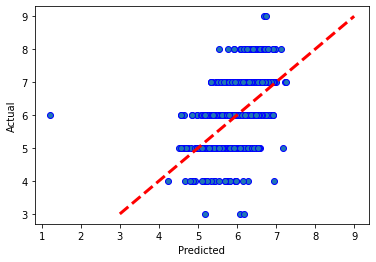

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(linreg_predictions, Y_test, edgecolors=(0, 0, 1))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [8]:
# Find the accuracy metrics
from sklearn import metrics
#MSE
mse_linreg=metrics.mean_squared_error(linreg_predictions,Y_test)
mse_svc=metrics.mean_squared_error(svr_predictions,Y_test)
mse_tree=metrics.mean_squared_error(regtree_predictions,Y_test)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE of linear regression is {}'.format(mse_linreg))
print('MSE of svc is {}'.format(mse_svc))
print('MSE of decision tree is {}'.format(mse_tree))

The model performance for testing set
--------------------------------------
MSE of linear regression is 0.5757932871135278
MSE of svc is 0.6528567583599527
MSE of decision tree is 0.7183673469387755
